# Supervised Learning
Class of learning underneath supervised learning. Goal is to predict labels (usually categorical) of new unlabeled examples, based on training data that contained the correct label. The email spam example earlier is an example.

- Single/binary class (spam/ham) or multiclass (dog/cat/fish).  
- Looking to create a decision boundary with a function. In 2-dimensions it can be visually, but gets complicated in larger feature spaces. 

<img src='files/diagrams/supervised-classification.png' style="width: 400px;">

## Today We'll Go Over Logistic Regression, 
### It's the classification swiss army knife, but Remember No Free Lunch
Popularized by David Wolpert. See [*The Lack of A Prior Distinctions Between Learning Algorithms, D.H. Wolpert, 1996](https://ieeexplore.ieee.org/document/6795940)

>I suppose it is tempting, if the only tool you have is a hammer, to treat everything like a nail.
<br><br>Abraham Maslow, 1966

### No single model will perform the best across all problems. 
### You should compare at least a couple of different models when you are trying to solve a problem.



# Why We Don't Use Linear Regression For Classification
#### [Linear Probability Model](https://en.wikipedia.org/wiki/Linear_probability_model)

$E[Y|X]=\Pr(Y=1|X)=x'\beta$

#### What could happen?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

iris = load_iris()
iris['data'][:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

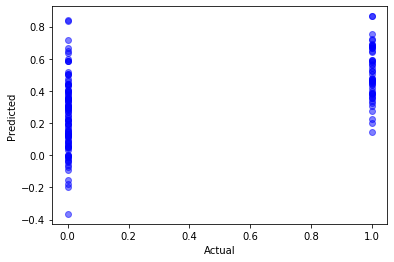

In [2]:
from sklearn.linear_model import LinearRegression

y = np.where(iris['target'] == 1, 1, 0)
X = iris['data']

iris_lm = LinearRegression().fit(X,y)
y_hat = iris_lm.predict(X)

plt.plot(y, y_hat, 'bo', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Thoughts on this?
- What are the boundaries of the predictions?

In [ ]:
plt.hist(y_hat, bins=20)
plt.title('Predicted Probabilities')
plt.show()

#### While linear regression can be efficient, it doesn't provide values bound between [0, 1], so it isn't a good choice for classification - what we really need is a probability (between 0 and 1) that relates to $P(Y=1|X)$ and linear regression isn't going to satisfy that requirement.

# Logistic Regression

<img src='files/diagrams/sklearn-logistic-function.png'>

[Image source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py)

## What is Logistic Regression?
See Chapter 3, Python Machine Learning by Raschka.

- Very popular model, probably the most common classification model used.  
- Linear model, works well when there are linearly separable classes.  
- Essentially estimates conditional probabilities, or odds ratios.

$$
odds = \frac{p}{1-p}, \space where \space p=\Pr(some\space event)
$$

Flipping a fair coin has $\Pr(heads)=0.5$, so the odds are 1:1 ($\frac{0.5}{1-0.5}$).

The **logit** function is:

$$
logit(p) = \log\frac{p}{1-p}
$$

### Model Framework

$$
logit(p(y=1|x))=w_0x_0+w_1x_1+w_2x_2+\dots+w_nx_n=\sum{w_ix_i}=w^Tx
$$

$p(y=1|x)$ is the conditional probability that the example belongs to the class given the features.  

Probability of belonging to the class is provided by the sigmoid function, which is the inverse of the logit function.

$$
\theta(z)=\frac{1}{1+e^{-z}}, \space where \space z=w^Tx
$$

$\theta(z) \in{[0,1]}$

To prove it is bound between 0 and 1:

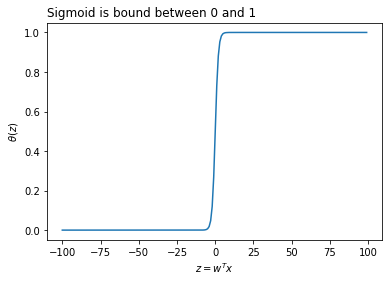

In [3]:
def sig(x):
    return 1/(1+np.exp(-x))

x = np.array(range(-100,100))

plt.plot(x, sig(x))
plt.xlabel('$z = w^Tx$')
plt.ylabel('$\\theta(z)$')
plt.title('Sigmoid is bound between 0 and 1', loc='left')
plt.show()

## Determining Whether $Y=1$ or $Y=0$

- Sigmoid provides a probability (bound between 0 and 1).  
- Generally, if $\theta(z)\geq 0.5$ the predicted class will be $1$ by default. 

$$
\hat{y}=
    \begin{cases}
      1 & \text{if $\theta(z)\geq 0.5$}\\
      0 & \text{otherwise}
    \end{cases} 
$$

- You can evaluate whether this makes sense for your business case though.

<img src='files/diagrams/logistic_regression_schematic.png'>

[Image source](http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/)

# Determing the $w_i$'s

### Recall, one method for estimating $w_i$'s for a linear regression problem was gradient descent on the following cost function:

$$
J(w)=\sum{(y-\hat{y})^2}
$$

### For logistic regression, we can't use MSE, but we can leverage the [likelihood function](https://en.wikipedia.org/wiki/Likelihood_function):

$$
L(w) = P(y|x;w)=\prod{P(y^{(i)}|x^{(i)};w)}
$$

Recall, the sigmoid function:
$$
\theta(z)=\frac{1}{1+e^{-z}}, \space where \space z=w^Tx
$$

Taking the partial derivative we get:

$$
\frac{d}{dw_j}=\frac{d}{dz}\frac{1}{1+e^{-z}}e^{-z}=\frac{1}{1+e^{-z}}(1-\frac{1}{1+e^{-z}})=\theta(z)(1-\theta(z))
$$

Which then we can funnel to the likelihood function:

$$
L(w) = P(y|x;w)=\prod{P(y^{(i)}|x^{(i)};w)}=\prod{(\theta(z^{(i)}))^{y^{(i)}}(1-\theta(z^{(i)}))^{1-y^{i}}}
$$

To make this easiest to maximize we take the log:

$$
l(w)=logL(w)=\sum{[y^{(i)}log(\theta(z^{(i)}))+(1-y^{(i)})log(1-\theta(z^{(i)})]}
$$

To convert to a minimization problem that we could use gradient descent on:

$$
J(w)=\sum{[-y^{(i)}log(\theta(z^{(i)}))-(1-y^{(i)})log(1-\theta(z^{(i)})]}
$$


## How does the cost relate to the sigmoid function?
[See Raschka, Chapter 3 for Full Snippet](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)

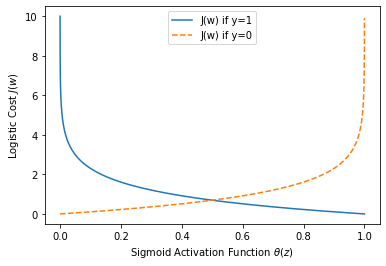

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sig(x):
    return 1/(1+np.exp(-x))

def cost_1(z):
    return -np.log(sig(z))

def cost_0(z):
    return -np.log(1-sig(z))

z = np.arange(-10, 10, 0.1)

phi_z = sig(z)
c1 = cost_1(z)
c0 = cost_0(z)

plt.plot(phi_z, c1, phi_z, c0, '--')
plt.legend(['J(w) if y=1', 'J(w) if y=0'])
plt.xlabel('Sigmoid Activation Function $\\theta(z)$')
plt.ylabel('Logistic Cost $J(w)$')
plt.show()

#### Cost approaches 0 (blue line) if we correctly predict the class. If we are wrong, it goes to infinity.

## Takeaways:
- Can use the same general framework for gradient descent [(see last week's lecture)](https://github.com/appliedecon/data602-lectures/tree/main/week05). 
- Still linear weights, but need to use log-likelihood instead of mean-squared error.  
- Cost goes to zero if we predict correctly, infinity if we are wrong.  
- Predictions are bound between 0 and 1.  
- Handles boolean prediction only.  

[See Python Machine Learning page 68-69 for an implementation.](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)

scikit-learn has more efficient implementations of several different solvers. So in practice, it won't use gradient descent exactly as outlined in the textbook.  

> #### Look in the documentation before using the models:
class sklearn.linear_model.LogisticRegression(  
penalty='l2',  
*,  
dual=False,   
tol=0.0001,   
C=1.0,   
fit_intercept=True,   
intercept_scaling=1,   
class_weight=None,   
random_state=None,   
solver='lbfgs',   
max_iter=100,   
multi_class='auto',   
verbose=0,   
warm_start=False,   
n_jobs=None,  
l1_ratio=None  
)

## And using scikit-learn with our iris example
Using logistic regression our predictions are bound between 0 and 1.

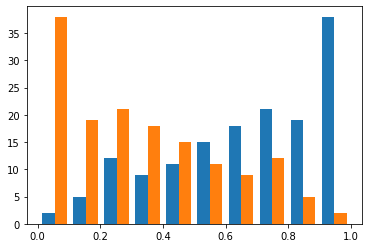

In [5]:
from sklearn.linear_model import LogisticRegression

y = np.where(iris['target'] == 1, 1, 0)
X = iris['data']

iris_lm = LogisticRegression(penalty='none').fit(X,y)
y_hatp = iris_lm.predict_proba(X)

plt.hist(y_hatp)
plt.show()

> scikit-learn outputs probabilities for each class.

In [6]:
y_hatp[:5, :]

array([[0.91508651, 0.08491349],
       [0.71708192, 0.28291808],
       [0.82801716, 0.17198284],
       [0.73198486, 0.26801514],
       [0.93292454, 0.06707546]])

## Recall, the general rule for generating the predicted label

$$
\hat{y}=
    \begin{cases}
      1 & \text{if $\theta(z)\geq 0.5$}\\
      0 & \text{otherwise}
    \end{cases} 
$$

Using the above rule, we can compare the predictions with actuals via a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

<img src='files/diagrams/cm.png' style='width: 400px;'>


[Image source](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw1BGzxd0qgbSOLBDGjHBsll&ust=1631231267101000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCODV_ZfI8PICFQAAAAAdAAAAABAD)

In [7]:
from sklearn.metrics import confusion_matrix

y_hat = iris_lm.predict(X)

print(confusion_matrix(y, y_hat))

[[86 14]
 [25 25]]


# Metrics

<img src='files/diagrams/cm-metrics.png'>

[Image source](https://en.wikipedia.org/wiki/Template:Diagnostic_testing_diagram)

# Accuracy
## Percent of Classes Correctly Predicted
$$\frac{TP + TN}{TP + TN + FN + FP}$$

- Pretty commonly cited.  
- Easy to understand. 
- Misleading when the classes aren't balanced.  

> If there are 100 people and the cancer rate is 1%, I can get 99% accuracy by predicting 'no cancer' for every example.

- The below options are better for dealing with unbalanced classes:

# Recall (true positive rate)
## Percent of "positive" you correctly predicted
$$\frac{TP}{TP + FN}$$

# Precision
## Percent of "positive" predictions are actually "positive":
$$\frac{TP}{TP + FP}$$

# [F1-Score](https://en.wikipedia.org/wiki/F-score)
## Harmonic mean of recall and precision
$$\frac{2TP}{2TP + FP + FN}$$

- All of these are really dependent on how you are attributed the prediction.  
- Generally, a single metric doesn't tell the whole story by itself.  
- F1 is a decent metric if you needed to optimize around one.  

# [Receiver Operating Characteric](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

> What if you more explicitly used the probability, instead of the default rule for determining a class?
$$
\hat{y}=
    \begin{cases}
      1 & \text{if $\theta(z)\geq 0.5$}\\
      0 & \text{otherwise}
    \end{cases} 
$$

### Receiver Operating Character (ROC) Curves allow you to see the trade-offs at various thresolds for determing if an example is predicted to be in the class or not.
- Using many different thresholds in the (0, 1) interval calculate the true positive and false positive rates for the "positive" class.  
- Plot the "curve" so you can visualize the trade-off across the universal of potential thresholds.

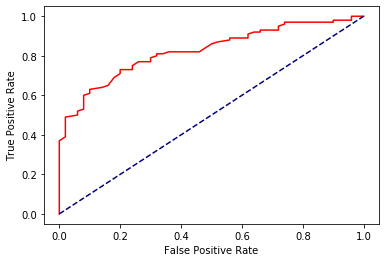

In [8]:
from sklearn.metrics import confusion_matrix

tpr_fpr = []
thr = np.arange(0,1,0.01)

def calc_tpr_fpr(actual, pred_prob, thres):
    pred = np.where(pred_prob >= thres, 1, 0)
    cm = confusion_matrix(actual, pred)
    
    tp_r = cm[0,0]/(cm[0,0]+cm[0,1])
    fp_r = cm[1,0]/(cm[1,0]+cm[1,1])
    
    return tp_r, fp_r 


for _ in thr:
    tpr_fpr.append(calc_tpr_fpr(y,y_hatp[:,1],_))
    
tpr = [x[0] for x in tpr_fpr]
fpr = [x[1] for x in tpr_fpr]

plt.plot(fpr, tpr, '-r')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## [Area Under the ROC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
- If we had perfect predictions at each thresholds, the curve would hug around the y-axis and top x-axis  
- If we aren't able to distinguish at all between classes, it'll bounce around near the dotted line.  

To summarize this chart we can look at the area underneath it.
- The area of a 1x1 square is 1, which would be the highest area under the roc curve (AUC).  
- You can use this as well to compare between models.  
- Anything near 0.50 or below means you model is worst then a coin flip.  

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_hatp[:,1])

0.8258

# Another Classification Problem - Loan Defaults
(Officially anyway, we've seen the Titantic and spam examples already)

Can we understand and predict whether an individual defaulted on their loan?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('data/default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


## As always, we need to explore the data

#### Check the structure

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


#### Look for missing values

In [12]:
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [13]:
print(f'Total missing values: {df.isna().sum().sum():,}')

Total missing values: 0


## Column by column analysis

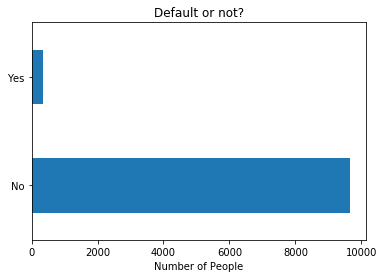

In [14]:
df['default'].value_counts().plot.barh()
plt.title('Default or not?')
plt.xlabel('Number of People')
plt.show()

In [15]:
defaultRate = df['default'].value_counts()
defaultRate = defaultRate['Yes']/defaultRate.sum()

print(f'Default rate: {defaultRate:.2%}')

Default rate: 3.33%


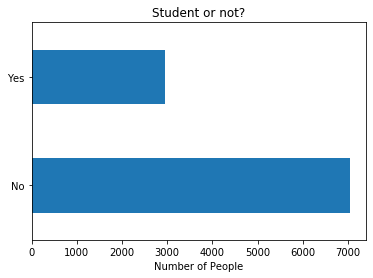

In [16]:
df['student'].value_counts().plot.barh()
plt.title('Student or not?')
plt.xlabel('Number of People')
plt.show()

In [17]:
studentRate = df['student'].value_counts()
studentRate = studentRate['Yes']/studentRate.sum()

print(f'Student rate: {studentRate:.2%}')

Student rate: 29.44%


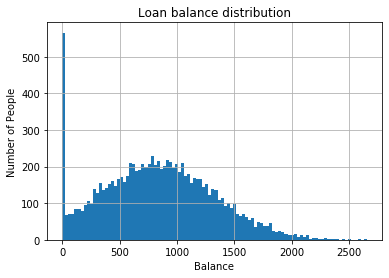

In [18]:
df['balance'].hist(bins=100)
plt.title('Loan balance distribution')
plt.xlabel('Balance')
plt.ylabel('Number of People')
plt.show()

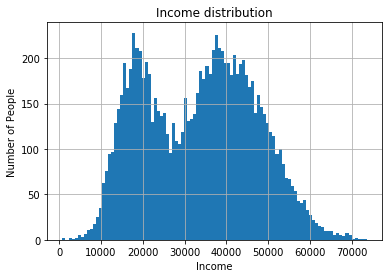

In [19]:
df['income'].hist(bins=100)
plt.title('Income distribution')
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.show()

#### This is interesting, almost looks like a mixture of two distributions.

## Looking between the columns

#### Default and Student

In [20]:
defaultStudent = df.pivot_table(index='default', columns='student', values='balance', aggfunc='count')
defaultStudent

student,No,Yes
default,,
No,6850,2817
Yes,206,127


#### $P(Default | Student=Yes)$

In [21]:
(defaultStudent/defaultStudent.sum(axis=0))['Yes']

default
No     0.956861
Yes    0.043139
Name: Yes, dtype: float64

#### $P(Default | Student=No)$

In [22]:
(defaultStudent/defaultStudent.sum(axis=0))['No']

default
No     0.970805
Yes    0.029195
Name: No, dtype: float64

#### Don't be afraid to create new variables

In [23]:
df['balance_income_ratio'] = df['balance']/df['income']
df['balance_income_ratio'].describe()

count    10000.000000
mean         0.032414
std          0.033757
min          0.000000
25%          0.013183
50%          0.024301
75%          0.041940
max          1.645025
Name: balance_income_ratio, dtype: float64

#### Inspect the distributions by student and default

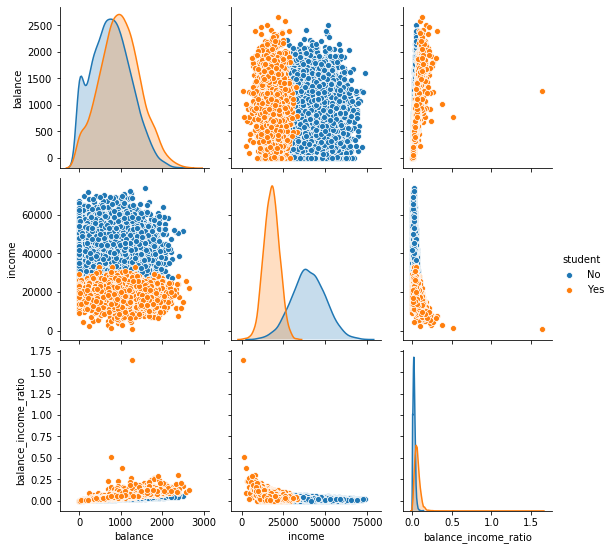

In [24]:
sns.pairplot(df, hue='student')
plt.show()

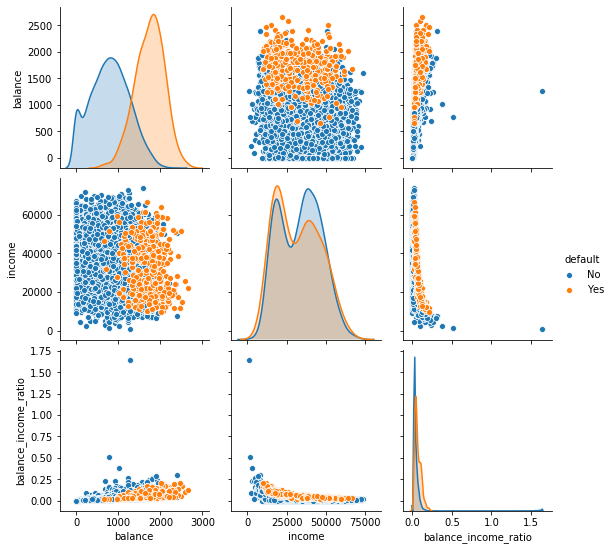

In [25]:
sns.pairplot(df, hue='default')
plt.show()

### Looks like there might be simple separation a linear model might be able to handle and we might want to introduce interaction variables to capture the mixture distribution of income better.

In [28]:
df['income_int'] = np.where(df['student'] == 'Yes', df['income'], 0)
df['balance_int'] = np.where(df['balance'] == 0, 1, 0)

print('Created new features.')

Created new features.


### May also want to consider adding a couple polynomial terms to see if that helps?
Very high loan balances should exponentially increase probability of default?

# Create our pipeline

## Split the data into training and test sets

In [29]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = df['default']
    X = df[[x for x in df.columns if x != 'default']]

    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 8,000
Test examples: 2,000


## Create a pipeline for the feature processing and model

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

def generate_estimates():
    polys = ['balance_income_ratio']
    non_polys = ['balance', 'income', 'income_int', 'balance_int']
    ohes = ['student']

    poly_pipeline = Pipeline([
        ('add_polynomials', PolynomialFeatures(2, include_bias=False)),
        ('standardize_poly', StandardScaler())]
    )
    
    processing_pipeline = ColumnTransformer(transformers=[
        ('poly_processing', poly_pipeline, polys),
        ('nonpoly_scaling', StandardScaler(), non_polys),
        ('dummys', OneHotEncoder(drop='first'), ohes)]
    )

    modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='none'))]
    )

    return modeling_pipeline.fit(X_train, y_train)

m = generate_estimates()
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1926
         Yes       0.73      0.30      0.42        74

    accuracy                           0.97      2000
   macro avg       0.85      0.65      0.70      2000
weighted avg       0.96      0.97      0.96      2000



> [See sklearn.metrics.precision_recall_fscore to only extract the raw metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)


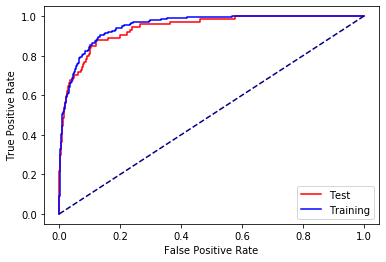

In [31]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='Yes')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.939876792680531

# Regularization
Logistic regression supports $L1$ and $L2$ regularization.

Call the original loss function:

$$
J(w)=\sum{[-y^{(i)}log(\theta(z^{(i)}))-(1-y^{(i)})log(1-\theta(z^{(i)})]}
$$

Adding $L2$:

$$
J(w)=\sum{[-y^{(i)}log(\theta(z^{(i)}))-(1-y^{(i)})log(1-\theta(z^{(i)})]}+\lambda ||w||^2
$$

Which is the conceptually the same way we penalize the weights in linear regression, by adding to the loss function. In the above, increasing $\lambda$ increasing the penalty for larger weights and will shrink our coefficient estimates.

## scikit-learn Implements this using the inverse of $\lambda$, smaller $C$ increases Regularization!
$C$ is the inverse of alpha. This'll will carry over to other models.
> Tip: Make sure you read the documentation and don't assume.

We modified the pipeline to accept the new hyperparameter. We'll use $L2$ or Ridge regularization.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

def generate_estimates(c):
    polys = ['balance_income_ratio']
    non_polys = ['balance', 'income', 'income_int', 'balance_int']
    ohes = ['student']

    poly_pipeline = Pipeline([
        ('add_polynomials', PolynomialFeatures(2, include_bias=False)),
        ('standardize_poly', StandardScaler())]
    )
    
    processing_pipeline = ColumnTransformer(transformers=[
        ('poly_processing', poly_pipeline, polys),
        ('nonpoly_scaling', StandardScaler(), non_polys),
        ('dummys', OneHotEncoder(drop='first'), ohes)]
    )

    modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='l2', C=c))]
    )

    return modeling_pipeline.fit(X_train, y_train)

lr_data = defaultdict(dict)

cvals = [0.005, 0.01, 0.10, 1.0, 2.0, 5.0, 10]
for cv in cvals:
    m = generate_estimates(c=cv)
    yhat = m.predict_proba(X_test)[:, 1]
    lr_data['coefs'][cv] = m['logreg'].coef_[0]
    lr_data['roc_auc'][cv] = roc_auc_score(y_test, yhat)

> This is the opposite behavior of the regularization parameter in Ridge/Lasso regression, values are converges to 0 and $C$ **decreases**.

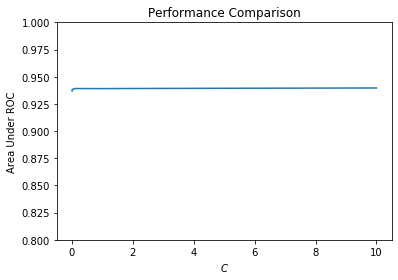

In [34]:
pd.Series(lr_data['roc_auc']).plot()
plt.ylim((0.8,1.0))
plt.xlabel('$C$')
plt.ylabel('Area Under ROC')
plt.title('Performance Comparison')
plt.show()

> Performance looks about the same. Default to the simpler model (higher $C$).

# Extending to Multiclass Problems
So far we have only considered boolean or binary classification problems. We can modify the sigmoid function to use softmax in order to handle a *n*-class problem.

$$
P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=0}^{k} e^{z_{k}^{(i)}}}
$$

<img src='files/diagrams/softmax_schematic_1.png'>

[Image source](http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/)

Outputs are normalized so they sum to one.
> This is built-in to the algorithms in scikit-learn. Each class's "probability" will be returned.

For more information, see [Raschka's explaination in the mlxtend library.](http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/)

In [35]:
from sklearn.datasets import load_iris

iX = load_iris()['data'][:,:2]
iy = load_iris()['target']

> iris is a 3-class problem

In [36]:
pd.Series(iy).value_counts()

0    50
1    50
2    50
dtype: int64

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.metrics import roc_auc_score

def generate_estimates(xtrain, ytrain):
    modeling_pipeline = Pipeline([
        ('data_processing', StandardScaler()),
        ('logreg', LogisticRegression(penalty='none'))]
    )

    return modeling_pipeline.fit(xtrain, ytrain)

iX_train, iX_test, iy_train, iy_test = train_test_split(iX, iy)

irisModel = generate_estimates(iX_train, iy_train)
ihats = irisModel.predict_proba(iX_test)
ihats_d = irisModel.predict(iX_test)

ihats[:5, :]

array([[1.15164257e-49, 4.84065629e-01, 5.15934371e-01],
       [6.06070041e-33, 2.25039850e-01, 7.74960150e-01],
       [1.23186402e-63, 8.57942394e-02, 9.14205761e-01],
       [6.06070041e-33, 2.25039850e-01, 7.74960150e-01],
       [1.74574426e-45, 1.69831164e-01, 8.30168836e-01]])

> Each sample gets a "probability" for being in the indicated class.

In [38]:
ihats[:5, :].sum(axis=1)

array([1., 1., 1., 1., 1.])

> They are normalized so the probabilities for each of the 3 classes sum to 1.0

Below code is from [Page 34 of Python Machine Learning 3rd Edition, Raschka](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb)

In [39]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

> We can visualize the decision boundaries because we restricted the model to only contain 2 features:

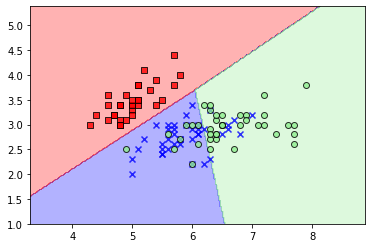

In [40]:
plot_decision_regions(iX_train, iy_train, irisModel)

It doesn't perfectly separate the classes in the training data.

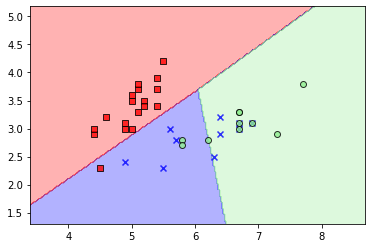

In [41]:
plot_decision_regions(iX_test, iy_test, irisModel)

And we see the same misclassification in the test data.

# Metrics for Evaluating Multiclass
Same basic metrics, but can calculate on a micro or macro basis. As an example:

## Precision - Micro
Weights all **examples** equally.

$$PRE_{micro} = \frac{TP_{1}+\dots+TP_{k}}{TP_{1}+\dots+TP_{k} + FP_{1}+\dots+FP_{k}}$$

In [42]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(iy_test, ihats_d, average='micro')[:-1]

(0.7368421052631579, 0.7368421052631579, 0.7368421052631579)


## Precision - Macro
Weights all **classes** equally.

$$\frac{PRE_{1}+\dots+PRE_{k}}{k}$$

In [43]:
precision_recall_fscore_support(iy_test, ihats_d, average='macro')[:-1]

(0.6794871794871794, 0.6814814814814815, 0.6748562226823096)

# Readings

- [Logistic Regression Youtube Demo](https://www.youtube.com/watch?v=71iXeuKFcQM)  
- [scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)  
- [Logistic Regression Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression) 
- [Ben Taskar’s Notes](https://web.archive.org/web/20151026065954/http://learning.cis.upenn.edu/cis520_fall2009/index.php?n=Lectures.Logistic)  
- [Cornell class CS4780](https://www.youtube.com/watch?v=GnkDzIOxfzI&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=12)  
- [Python Machine Learning (Raschka) - Chapter 3](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb)  
- [Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow (Geron) - Chaper 4](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)   
- [Softmax Regression for multiclass problems](http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/)  
- [Logistic Regression: From Introductory to Advanced Concepts and Applications](https://methods.sagepub.com/book/logistic-regression-from-introductory-to-advanced-concepts-and-applications)